In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
df=pd.read_csv('data.csv')
df=df.drop(columns=['id','Unnamed: 32'])
df['average_worst_factors']=round((df['radius_worst']+df['texture_worst']+df['perimeter_worst']+df['area_worst']+df['smoothness_worst']+df['compactness_worst']+df['concavity_worst']+df['concave points_worst']+df['symmetry_worst']+df['fractal_dimension_worst'])/10)
df['average_se_factors']=round((df['radius_se']+df['texture_se']+df['perimeter_se']+df['area_se']+df['smoothness_se']+df['compactness_se']+df['concavity_se']+df['concave points_se']+df['symmetry_se']+df['fractal_dimension_se'])/10)
df['average_mean_factors']=round((df['radius_mean']+df['texture_mean']+df['perimeter_mean']+df['area_mean']+df['smoothness_mean']+df['compactness_mean']+df['concavity_mean']+df['concave points_mean']+df['symmetry_mean']+df['fractal_dimension_mean'])/10)
df['conclusion']=df['diagnosis']
df=df.drop(columns=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])
df=df.drop(columns=['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])
df=df.drop(columns=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
df=df.dropna(how='any')
df

,average_worst_factors,average_se_factors,average_mean_factors,conclusion
0,225.0,16.0,115.0,M
1,216.0,8.0,150.0,M
2,191.0,10.0,137.0,M
3,71.0,3.0,50.0,M
4,177.0,10.0,147.0,M
...,...,...,...,...
564,225.0,17.0,167.0,M
565,195.0,11.0,144.0,M
566,131.0,5.0,101.0,M
567,207.0,9.0,146.0,M


In [68]:
df['conclusion'].unique()

array(['M', 'B'], dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['conclusion']=le.fit_transform(df['conclusion'])
df

,average_worst_factors,average_se_factors,average_mean_factors,conclusion
0,225.0,16.0,115.0,1
1,216.0,8.0,150.0,1
2,191.0,10.0,137.0,1
3,71.0,3.0,50.0,1
4,177.0,10.0,147.0,1
...,...,...,...,...
564,225.0,17.0,167.0,1
565,195.0,11.0,144.0,1
566,131.0,5.0,101.0,1
567,207.0,9.0,146.0,1


In [71]:
df['conclusion'].unique()

array([1, 0])

In [72]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [74]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [75]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, batch_size=15, epochs=150)
ann.save("BCR.h5")

Epoch 1/150
31/31 [==============================] - 0s 1ms/step - loss: 12.4502 - accuracy: 0.3544
Epoch 2/150
31/31 [==============================] - 0s 1ms/step - loss: 1.5687 - accuracy: 0.4829
Epoch 3/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7886
Epoch 4/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.8536
Epoch 5/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.8676
Epoch 6/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.8931
Epoch 7/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8708
Epoch 8/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8928
Epoch 9/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8986
Epoch 10/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8877
Epoch 11

Saved Model & Graph to disk


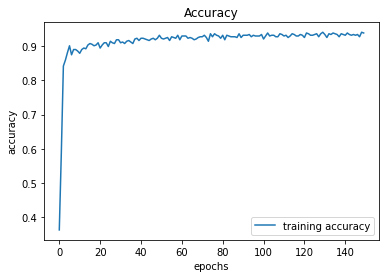

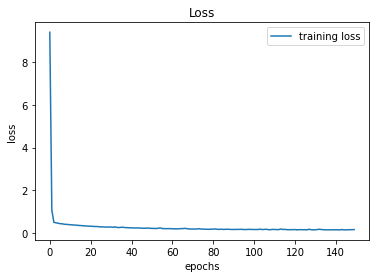

In [76]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [77]:
model = tf.keras.models.load_model('BCR.h5')
print("Loaded model from disk")
test=[[100,150,200]]
print(ann.predict(test))

Loaded model from disk
[[1.]]


In [84]:
print(ann.predict([[37,2,26]]))

[[0.03712079]]


In [86]:
print(ann.predict([[10,25,26]]))

[[0.9533137]]


In [87]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100,"%")

[[65  2]
 [ 6 41]]
92.98245614035088 %
